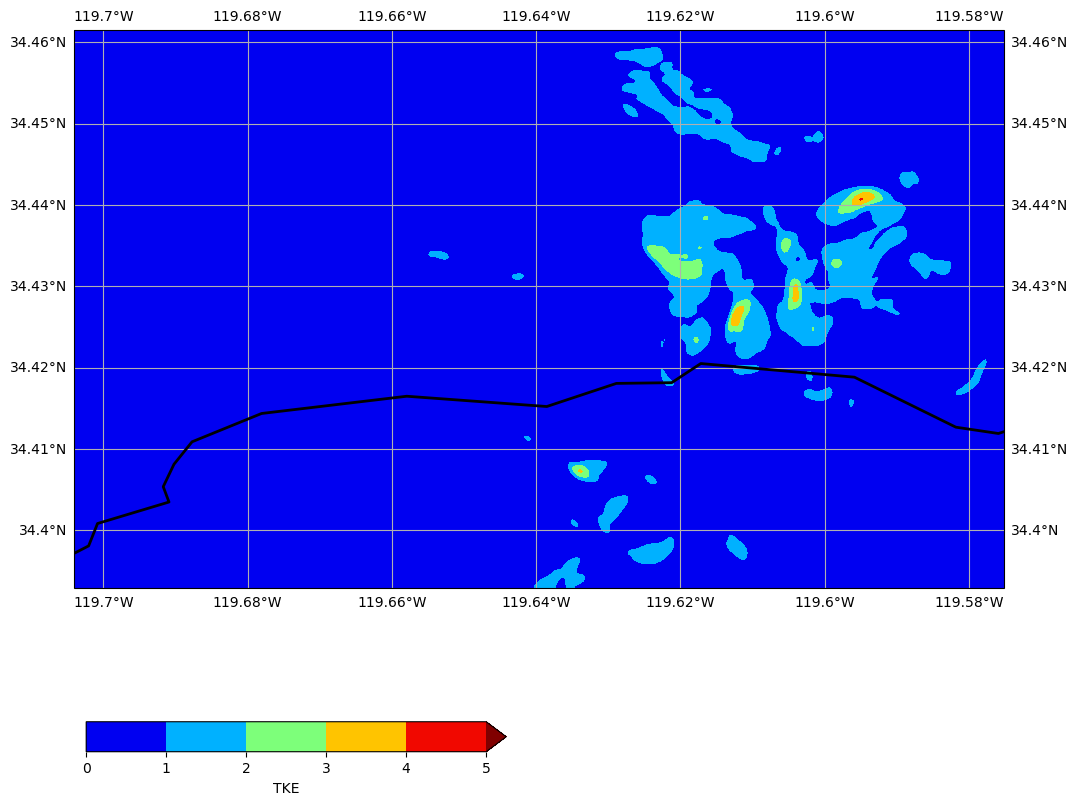

In [14]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import numpy as np
import wrf
from wrf import getvar, interplevel, interpline, CoordPair



f = Dataset("/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-TKE-IOP1/wrfout_d05_2022-04-05_04:00:00")
#f = Dataset("/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-MYNN-IOP8/wrfout_d05_2022-05-07_18:00:00")
#f = Dataset("/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-IOP1-new/Run/wrfout_d05_2022-04-05_09:00:00")

xlat = f.variables['XLAT'][:]
xlon = f.variables['XLONG'][:]
hgt = f.variables['HGT'][:]
u_sur = f.variables["U10"][:]
v_sur = f.variables['V10'][:]
#u = f.variables['U'][6,1,:195,:195]
#v = f.variables['V'][6,1,:195,:195]
ph = f.variables['PH'][:]
phb = f.variables['PHB'][:]
tke = f.variables['TKE'][0,1,:,:]
t2 = f.variables['T2'][:]
q2 = f.variables['Q2'][:]
g = 9.81
z = (ph+phb)/g
x = xlat[1,:,:]
y = xlon[1,:,:]
wspd = np.sqrt((u_sur**2)+(v_sur**2))

slp = wrf.getvar(f, 'slp')



import numpy as np
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12, 15))

proj = crs.Miller()
ax = fig.add_subplot(1, 1, 1, projection=proj)

#extent = [-122, -118, 32, 36]
#ax.set_extent(extent, crs=crs.PlateCarree())

#extent = [-120.4,-119.8, 34.35, 34.6]
#ax.set_extent(extent, crs=crs.PlateCarree())


#plt.title('10 m wind at 0600 UTC 5 Apr')

ax.coastlines(resolution='10m', color='black', linewidth=2, zorder = 10)

states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='10m', facecolor='none', zorder = 9)
#ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5, zorder = 7)

#ax.quiver(y[::2,::2], x[::2,::2], u_sur[0,::2,::2], v_sur[0,::2,::2], transform=crs.PlateCarree(), scale = 500, zorder = 11)
#ax.quiver(y[:,:], x[:,:], u_sur[0,:,:], v_sur[0,:,:], transform=crs.PlateCarree(), scale = 500, zorder = 9)
#ax.streamplot(y, x, u_sur[7,:,:], v_sur[7,:,:], transform = crs.PlateCarree(), density = 0.5, color ='k', arrowsize = 1, broken_streamlines = False)
cbaxes = fig.add_axes([.135, 0.20, 0.35, 0.02]) #[left, bottom, width, height]
vmin = 0
vmax = 5
cs = ax.contourf(y,x,tke,extend='max',levels=np.linspace(vmin,vmax,6),transform = crs.PlateCarree(), cmap ='jet')
#vmin = 1000
#vmax = 1020
#cs = ax.contourf(y, x, slp, transform = crs.PlateCarree(), levels=np.linspace(vmin,vmax,11), zorder = 9, cmap = 'jet')


#ax.plot([-119.59],[34.455], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.59],[34.445], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.59],[34.435], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.59],[34.425], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.59],[34.415], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#
#ax.plot([-119.64],[34.455], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.64],[34.445], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.64],[34.435], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.64],[34.425], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.64],[34.415], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#
#ax.plot([-120.215], [34.476], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.920], [34.476], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.028], [34.466], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.764], [34.459], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.050], [34.483], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.079], [34.519], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.093], [34.530], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.988], [34.530], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.786], [34.520], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.722], [34.501], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.650], [34.488], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.190], [34.505], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.941], [34.558], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.047], [34.695], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.010], [34.732], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.747], [34.599], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.824], [34.495], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)

#
#ax.plot([-119.649],[34.461], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.626],[34.445], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)

#ax.xlabel_style = {'size': 25, 'color': 'black'}
#ax.xlabel_style = {'color': 'black', 'weight': 'bold'}

#cs = ax.contourf(x, y, wspd[0,:], transform = crs.PlateCarree(), cmap = 'jet')#, levels = np.arange(0, 50, 2))

plt.colorbar(cs, orientation='horizontal', pad = .01, fraction = .025, cax = cbaxes, label = 'TKE')
#cbar.ax.tick_params(labelsize=25) 

ax.gridlines(draw_labels=True)

#import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker
#import cartopy.crs as ccrs
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
##
##
###ax = plt.axes(projection=ccrs.Mercator())
###ax.coastlines()
#gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True,
#                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
#gl.xlabels_top = False
#gl.ylabels_right = False
#gl.xlines = True
##gl.xlocator = mticker.FixedLocator([-119.8, -120.1, -120.4])
##gl.ylocator = mticker.FixedLocator([33.8, 34, 34.2])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'black'}
#gl.xlabel_style = {'size': 18, 'color': 'black', 'weight': 'bold'}
#gl.ylabel_style = {'size': 15, 'color': 'black'}
#gl.ylabel_style = {'size': 18, 'color': 'black', 'weight': 'bold'}
#
#plt.show()
#ax.plot([-81.28, -78.77, -70, -71.99, -81.28], [42.99, 39.72, 42.75, 45.92, 42.99], transform = ccrs.PlateCarree(), color = 'black', zorder = 12)



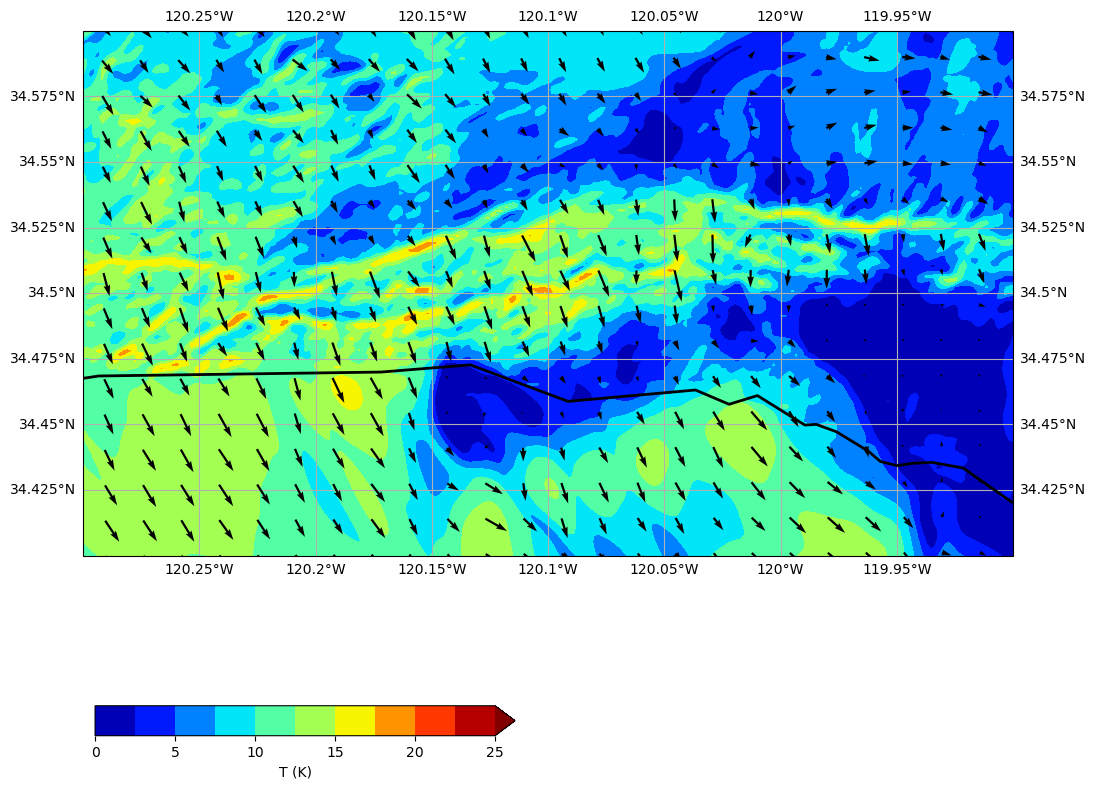

In [29]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import numpy as np
import wrf
from wrf import getvar, interplevel, interpline, CoordPair



f = Dataset("/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-TKE-IOP8/wrfout_d05_2022-05-09_00:00:00")
#f = Dataset("/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-MYNN-IOP8/wrfout_d05_2022-05-07_18:00:00")
#f = Dataset("/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-IOP1-new/Run/wrfout_d05_2022-04-05_09:00:00")

xlat = f.variables['XLAT'][:]
xlon = f.variables['XLONG'][:]
hgt = f.variables['HGT'][:]
u_sur = f.variables["U10"][:]
v_sur = f.variables['V10'][:]
#u = f.variables['U'][6,1,:195,:195]
#v = f.variables['V'][6,1,:195,:195]
ph = f.variables['PH'][:]
phb = f.variables['PHB'][:]
tke = f.variables['TKE'][0,1,:,:]
t2 = f.variables['T2'][:]
q2 = f.variables['Q2'][:]
g = 9.81
z = (ph+phb)/g
x = xlat[1,:,:]
y = xlon[1,:,:]
wspd = np.sqrt((u_sur**2)+(v_sur**2))

slp = wrf.getvar(f, 'slp')



import numpy as np
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12, 15))

proj = crs.Miller()
ax = fig.add_subplot(1, 1, 1, projection=proj)

#extent = [-122, -118, 32, 36]
#ax.set_extent(extent, crs=crs.PlateCarree())

#extent = [-119.8, -119.5, 34.35, 34.55]
#ax.set_extent(extent, crs=crs.PlateCarree())

extent = [-120.3,-119.9, 34.4, 34.6]
ax.set_extent(extent, crs=crs.PlateCarree())


#plt.title('10 m wind at 0600 UTC 5 Apr')

ax.coastlines(resolution='10m', color='black', linewidth=2, zorder = 10)

#states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='10m', facecolor='none', zorder = 9)
#ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5, zorder = 10)

#ax.quiver(y[::2,::2], x[::2,::2], u_sur[0,::2,::2], v_sur[0,::2,::2], transform=crs.PlateCarree(), scale = 500, zorder = 11)
ax.quiver(y[::10,::10], x[::10,::10], u_sur[0,::10,::10], v_sur[0,::10,::10], transform=crs.PlateCarree(), scale = 500, zorder = 11)
#ax.streamplot(y, x, u_sur[7,:,:], v_sur[7,:,:], transform = crs.PlateCarree(), density = 0.5, color ='k', arrowsize = 1, broken_streamlines = False)
cbaxes = fig.add_axes([.135, 0.20, 0.35, 0.02]) #[left, bottom, width, height]
vmin = 0
vmax = 25
cs = ax.contourf(y,x,wspd[0,:],extend='max',levels=np.linspace(vmin,vmax,11),transform = crs.PlateCarree(), cmap ='jet')
#vmin = 270
#vmax = 295
#cs = ax.contourf(y, x, t2[0,:,:], transform = crs.PlateCarree(), levels=np.linspace(vmin,vmax,26), zorder = 9, cmap = 'jet')

#vmin = 1000
#vmax = 1020
#cs = ax.contourf(y, x, slp, transform = crs.PlateCarree(), levels=np.linspace(vmin,vmax,11), zorder = 9, cmap = 'jet')

#vmin = 0.003
#vmax = 0.006
#cs = ax.contourf(y, x, q2[0,:,:], transform = crs.PlateCarree(), levels=np.linspace(vmin,vmax,11), zorder = 9, cmap = 'jet')


#ax.xlabel_style = {'size': 25, 'color': 'black'}
#ax.xlabel_style = {'color': 'black', 'weight': 'bold'}

#cs = ax.contourf(x, y, wspd[0,:], transform = crs.PlateCarree(), cmap = 'jet')#, levels = np.arange(0, 50, 2))

plt.colorbar(cs, orientation='horizontal', pad = .01, fraction = .025, cax = cbaxes, label = 'T (K)')
#cbar.ax.tick_params(labelsize=25) 

ax.gridlines(draw_labels=True)




/afs/crc.nd.edu/user/a/ajanisz2/miniconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/afs/crc.nd.edu/user/a/ajanisz2/miniconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


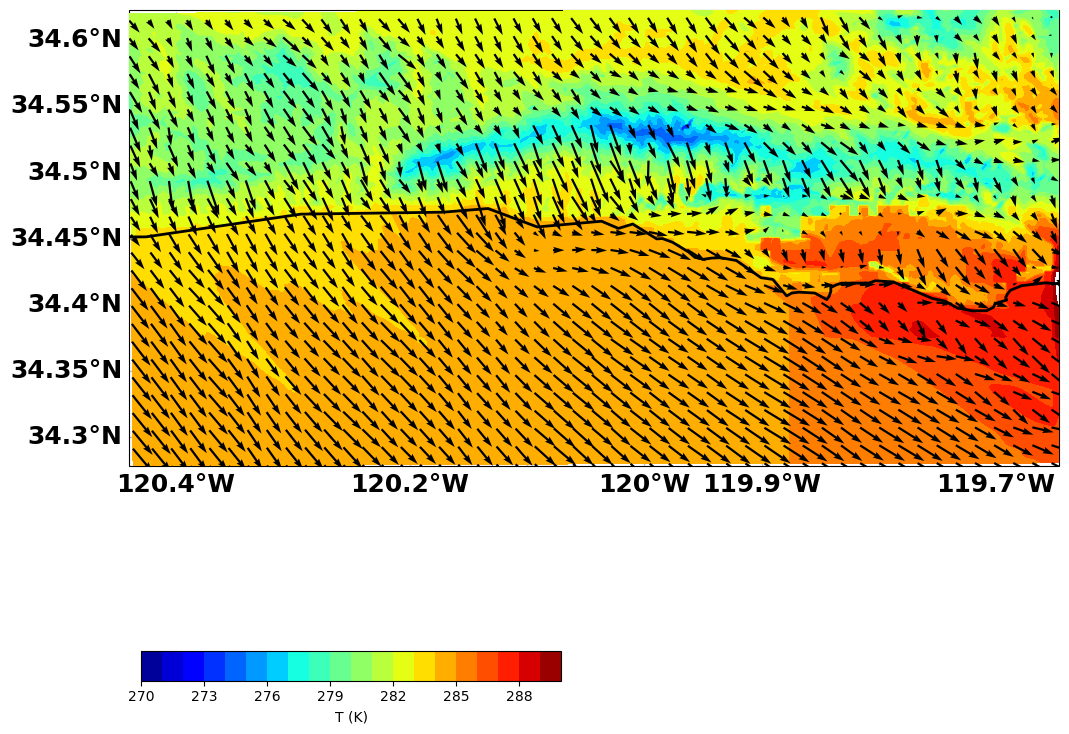

In [66]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import numpy as np
import wrf
from wrf import getvar, interplevel, interpline, CoordPair



f = Dataset("/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-TKE-IOP8/wrfout_d04_2022-05-09_04:00:00")
#f = Dataset("/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-MYNN-IOP8/wrfout_d05_2022-05-07_18:00:00")
#f = Dataset("/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-IOP1-new/Run/wrfout_d05_2022-04-05_09:00:00")

xlat = f.variables['XLAT'][:]
xlon = f.variables['XLONG'][:]
hgt = f.variables['HGT'][:]
u_sur = f.variables["U10"][:]
v_sur = f.variables['V10'][:]
#u = f.variables['U'][6,1,:195,:195]
#v = f.variables['V'][6,1,:195,:195]
ph = f.variables['PH'][:]
phb = f.variables['PHB'][:]
tke = f.variables['TKE'][0,1,:,:]
t2 = f.variables['T2'][:]
q2 = f.variables['Q2'][:]
g = 9.81
z = (ph+phb)/g
x = xlat[1,:,:]
y = xlon[1,:,:]
wspd = np.sqrt((u_sur**2)+(v_sur**2))

slp = wrf.getvar(f, 'slp')



import numpy as np
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12, 15))

proj = crs.Miller()
ax = fig.add_subplot(1, 1, 1, projection=proj)

#extent = [-122, -118, 32, 36]
#ax.set_extent(extent, crs=crs.PlateCarree())

#extent = [-120.4,-119.8, 34.35, 34.6]
#ax.set_extent(extent, crs=crs.PlateCarree())


#plt.title('10 m wind at 0600 UTC 5 Apr')

ax.coastlines(resolution='10m', color='black', linewidth=2, zorder = 10)

#states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='10m', facecolor='none', zorder = 9)
#ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5, zorder = 10)

#ax.quiver(y[::2,::2], x[::2,::2], u_sur[0,::2,::2], v_sur[0,::2,::2], transform=crs.PlateCarree(), scale = 500, zorder = 11)
ax.quiver(y[::10,::10], x[::10,::10], u_sur[0,::10,::10], v_sur[0,::10,::10], transform=crs.PlateCarree(), scale = 500, zorder = 11)
#ax.streamplot(y, x, u_sur[7,:,:], v_sur[7,:,:], transform = crs.PlateCarree(), density = 0.5, color ='k', arrowsize = 1, broken_streamlines = False)
cbaxes = fig.add_axes([.135, 0.20, 0.35, 0.02]) #[left, bottom, width, height]
#vmin = 0
#vmax = 25
#cs = ax.contourf(y,x,wspd[0,:],extend='max',levels=np.linspace(vmin,vmax,11),transform = crs.PlateCarree(), cmap ='jet')
#vmin = 0
#vmax = 0.006
#cs = ax.contourf(y, x, q2[0,:,:], transform = crs.PlateCarree(), levels=np.linspace(vmin,vmax,21), zorder = 9, cmap = 'jet')
vmin = 270
vmax = 290
cs = ax.contourf(y, x, t2[0,:,:], transform = crs.PlateCarree(), levels=np.linspace(vmin,vmax,21), zorder = 9, cmap = 'jet')
#
#ax.plot([-119.59],[34.455], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.59],[34.445], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.59],[34.435], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.59],[34.425], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.59],[34.415], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#
#ax.plot([-119.64],[34.455], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.64],[34.445], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.64],[34.435], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.64],[34.425], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.64],[34.415], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#
#ax.plot([-120.215], [34.476], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.920], [34.476], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.028], [34.466], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.764], [34.459], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.050], [34.483], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.079], [34.519], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.093], [34.530], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.988], [34.530], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.786], [34.520], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.722], [34.501], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.650], [34.488], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.190], [34.505], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.941], [34.558], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.047], [34.695], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-120.010], [34.732], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.747], [34.599], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.824], [34.495], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)

#
#ax.plot([-119.649],[34.461], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)
#ax.plot([-119.626],[34.445], 'ro', linewidth=5, markersize=12, transform = crs.PlateCarree(), zorder=9)

#ax.xlabel_style = {'size': 25, 'color': 'black'}
#ax.xlabel_style = {'color': 'black', 'weight': 'bold'}

#cs = ax.contourf(x, y, wspd[0,:], transform = crs.PlateCarree(), cmap = 'jet')#, levels = np.arange(0, 50, 2))

plt.colorbar(cs, orientation='horizontal', pad = .01, fraction = .025, cax = cbaxes, label = 'T (K)')
#cbar.ax.tick_params(labelsize=25) 

#ax.gridlines(draw_labels=True)

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#
#
##ax = plt.axes(projection=ccrs.Mercator())
##ax.coastlines()
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([-119.8, -120.1, -120.4])
#gl.ylocator = mticker.FixedLocator([33.8, 34, 34.2])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.xlabel_style = {'size': 18, 'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black', 'weight': 'bold'}

plt.show()
#ax.plot([-81.28, -78.77, -70, -71.99, -81.28], [42.99, 39.72, 42.75, 45.92, 42.99], transform = ccrs.PlateCarree(), color = 'black', zorder = 12)

